# Ideia do Projeto Slot 4 - Wallmart

Case: Você foi contratado pelo Wallmart para fazer um levantamento do faturamento das lojas nos USA e apontar qual loja seria melhor para expandir seu tamanho. É preciso analisar as vendas semanais de cada loja, calcular algumas informações importantes que serão perguntadas e ao final de tudo, indicar em qual loja deva ser investida.

# Sobre o Wallmart
[Walmart, Inc.](https://pt.wikipedia.org/wiki/Walmart), é uma multinacional estadunidense de lojas de departamento. A companhia foi fundada por Sam Walton em 1962, incorporada em 31 de outubro de 1969 e feita capital aberto na New York Stock Exchange, em 1972. No ano de 2021, obteve um um lucro de $13.51 Bilhões.

# O Dataset

Sendo uma das principais lojas de varejo do mundo, os dados contemplam as vendas semanais de 45 lojas espalhadas pelos Estados Unidos. O Walmart realiza vários eventos promocionais de descontos ao longo do ano. Essas remarcações precedem feriados importantes, os quatro maiores de todos, que são o Super Bowl, o Dia do Trabalho, o Dia de Ação de Graças e o Natal. As semanas que incluem esses feriados têm um peso maior.

Sobre o [Dataset do Wallmart](https://www.kaggle.com/yasserh/walmart-dataset)

Os dados apresentam as vendas semanais de 05/02/10 até 01/11/12 em 45 lojas varejistas da rede Wallmart e também algumas métricas econômicas e meteriológicas por semana. A descrição destas características estão abaixo:

Variável | Descrição
--- | ---
Store | Número da Loja
Date | Semana de venda
Weekly_Sales | Venda naquela semana
Holiday_Flag | Flag se é ou não semana com feriado (1 – Holiday week 0 – Non-holiday week)
Temperature | Temperatuda do dia em ºF
Fuel_Price | Preço do combustível na região da loja
CPI | Índice de preços ao consumidor
Unemployment | Taxa de desemprego

Variável | Descrição
--- | ---
Holiday Events | Semanas
Super Bowl |  12-Feb-10, 11-Feb-11, 10-Feb-12
Labour Day | 10-Sep-10, 9-Sep-11, 7-Sep-12
Thanksgiving |  26-Nov-10, 25-Nov-11, 23-Nov-12
Christmas |  31-Dec-10, 30-Dec-11, 28-Dec-12

# Perguntas importantes a serem respondidas

1. Qual o preço médio de venda semanal por loja?
2. Qual o atributo que tem maior correlação (positiva ou negatica) com o número de vendas? (E que faça sentido)
3. Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?
4. Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.
5. Pensando na expansão de uma das lojas, que loja você escolheria e o por que?  

# Importação de bibliotecas


In [141]:
import numpy as np
import pandas as pd

# Exibição de dados
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno # facilita a plotagem de dados faltantes
from ipywidgets import interact, widgets # mostra de forma iterativa os dados

# Carregar alguns dados
from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [105]:
df = pd.read_csv('/content/Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [106]:
#1) Converter a coluna Date em Datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
df.describe()
# Aparentemente não temos outliers nessa distribuição

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


# 1) Qual o preço médio de venda semanal por loja?

In [135]:
df_preço_medio = df.groupby('Store')['Weekly_Sales'].agg('mean').reset_index()
df_preço_medio = df_preço_medio.sort_values(by= 'Weekly_Sales',ascending=False)
df_preço_medio.head(15)

,Store,Weekly_Sales
19,20,2.107677e+06
3,4,2.094713e+06
13,14,2.020978e+06
12,13,2.003620e+06
1,2,1.925751e+06
9,10,1.899425e+06
26,27,1.775216e+06
5,6,1.564728e+06
0,1,1.555264e+06
38,39,1.450668e+06


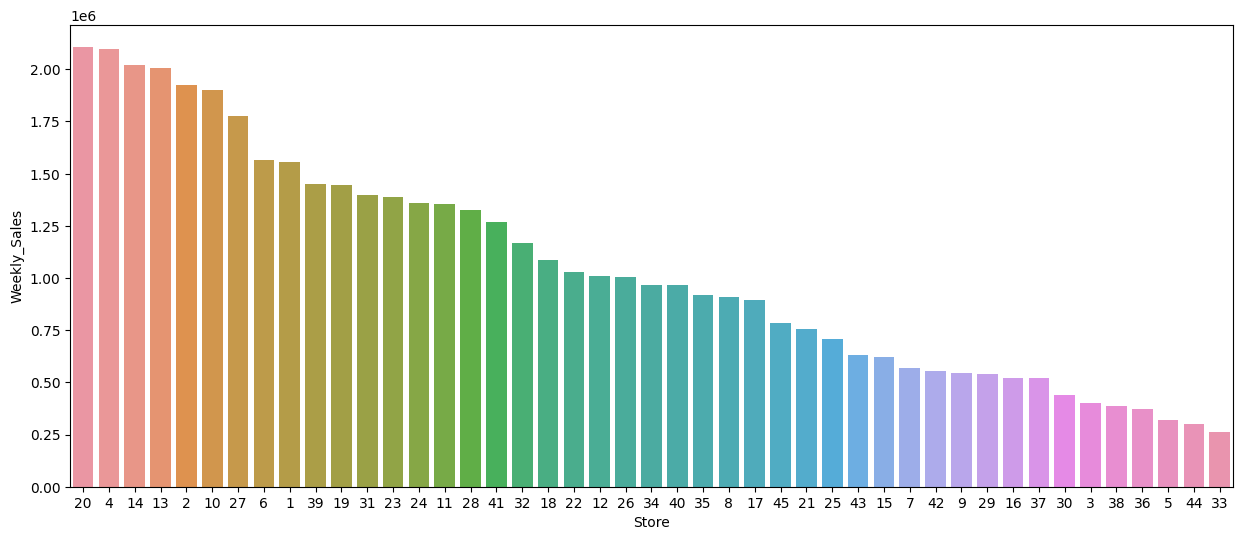

In [139]:
#
plt.figure(figsize=(15,6))

# plotando em um gráfico
grafico_Preco_medio = sns.barplot(data=df_preço_medio,x="Store", y="Weekly_Sales", order=df_preço_medio['Store'])

# 2. Qual o atributo que tem maior correlação (positiva ou negatica) com o número de vendas? (E que faça sentido)

In [46]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [47]:
# Correlação entre as colunas, quanto maior o valor,
df_corr = df[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
df_corr.corr()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000


<Axes: >

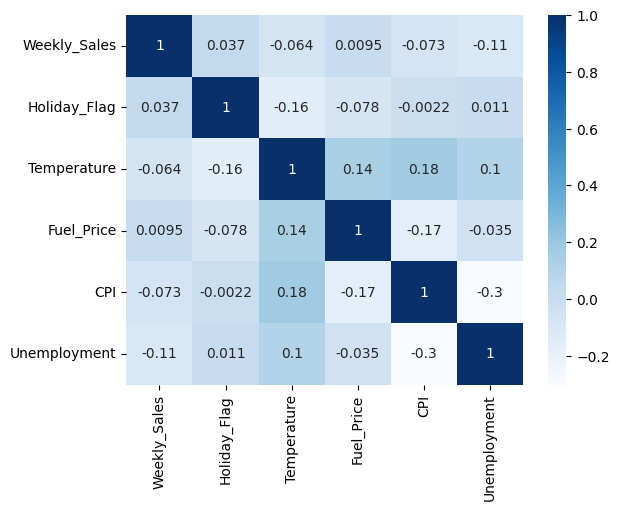

In [140]:
# quanto mais claro está mais correlação positiva
# Quanto mais escuro, mais correlação negativa
# Exemplo - weekly sales com a taxa de desemprego é a maior relação
sns.heatmap(df_corr.corr(), cmap='Blues', annot=True)

# 3) Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?

In [62]:
# A soma de todas as lojas
df_acul = df.groupby('Store')['Weekly_Sales'].agg('sum').reset_index().sort_values(by='Weekly_Sales', ascending=False).iloc[0,:]
top_store = df_acul.Store
top_store

20.0

In [66]:
df_top_store =  df[df.Store == top_store]
top_mean = df_top_store['Weekly_Sales'].mean()
df_top_store_overmean  = df_top_store[df_top_store.Weekly_Sales >= top_mean]
df_top_store_overmean.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2717,20,05-02-2010,2401395.47,0,25.92,2.784,204.247194,8.187
2718,20,12-02-2010,2109107.90,1,22.12,2.773,204.385747,8.187
2719,20,19-02-2010,2161549.76,0,25.43,2.745,204.432100,8.187
2721,20,05-03-2010,2119213.72,0,31.75,2.777,204.494073,8.187
2725,20,02-04-2010,2405395.22,0,51.00,2.850,204.025284,7.856


In [67]:
print('Semanas totais', df_top_store.shape[0])

Semanas totais 143


In [72]:
print('Semanas acima da media: ',df_top_store_overmean.shape[0])

Semanas acima da media:  52


 # 4) Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

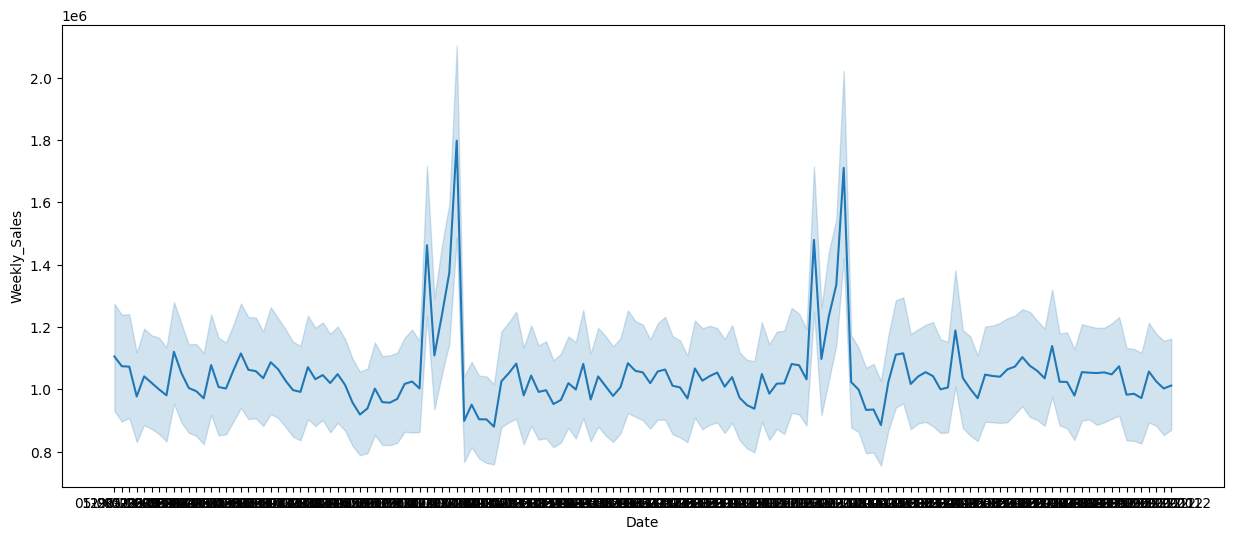

In [76]:
# Lineplot
plt.figure(figsize=(15, 6))

sns.lineplot(data=df, x='Date', y='Weekly_Sales')

In [93]:
holiday_dict ={
    'Super Bowl': ['12/02/10', '11/02/11', '10/02/12'],
    'Labour Day':['10/09/10', '09/09/11', '07/09/12'],
    'Thanksgiving':['26/11/10', '25/11/11', '23/11/12'],
    'Christmas':['31/12/10','30/12/11', '28/12/12']
}
holiday_dict

{'Super Bowl': ['12/02/10', '11/02/11', '10/02/12'],
 'Labour Day': ['10/09/10', '09/09/11', '07/09/12'],
 'Thanksgiving': ['26/11/10', '25/11/11', '23/11/12'],
 'Christmas': ['31/12/10', '30/12/11', '28/12/12']}

In [111]:
from datetime import date, datetime

In [112]:
df['Date']= pd.to_datetime(df['Date'], format='%d/%m/%y')

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

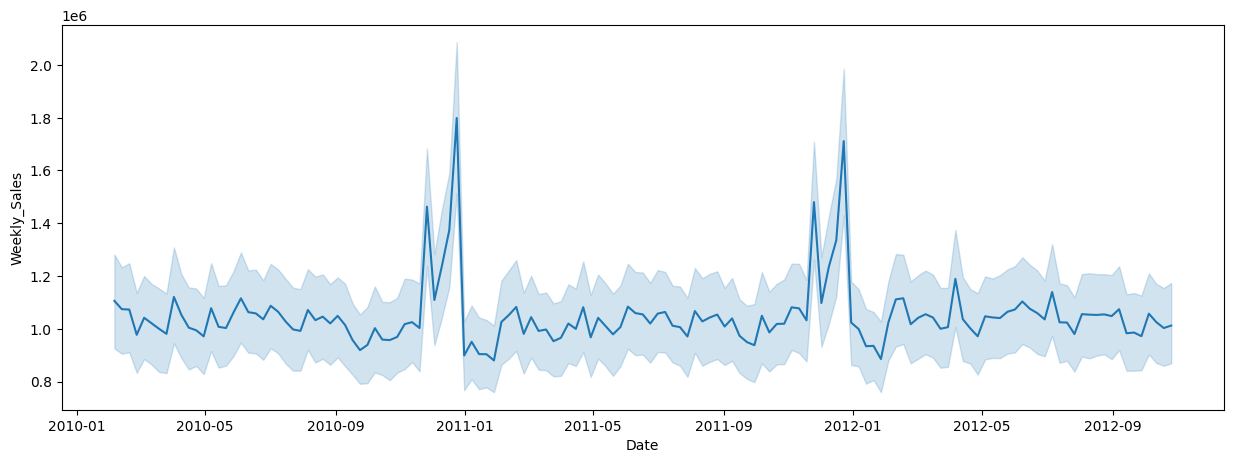

In [113]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df, x='Date', y='Weekly_Sales')

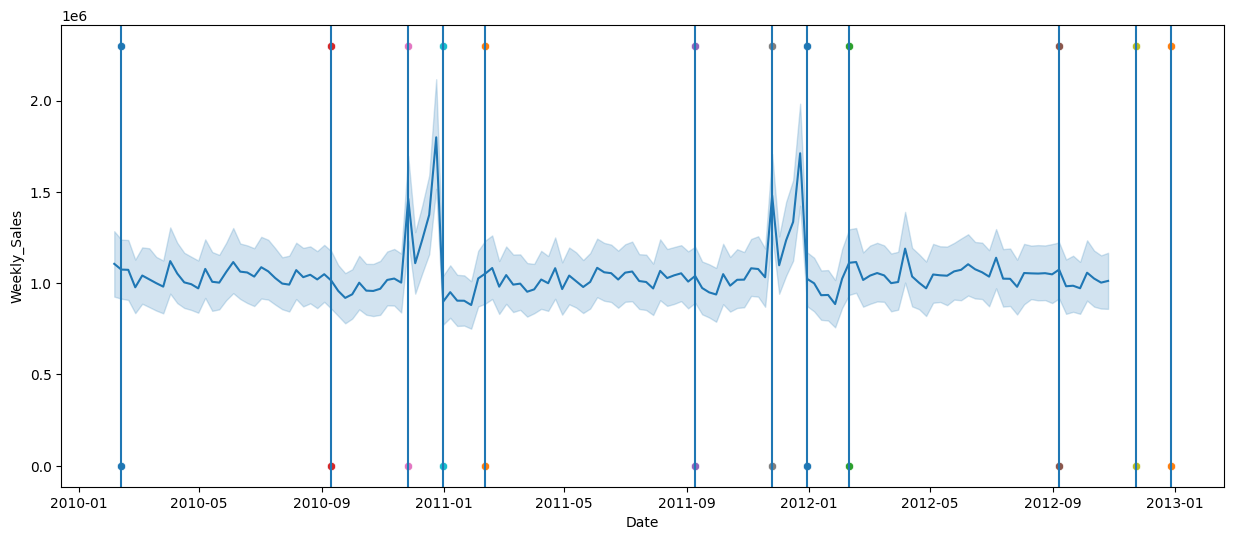

In [114]:
# iterando sobre as datas pedidas de feriados e mostrando um gráfico com todas essas datas

plt.figure(figsize=(15, 6))

sns.lineplot(data=df, x='Date', y='Weekly_Sales')


for i in holiday_dict.keys():
  for x in holiday_dict[i]:
    sns.scatterplot(x= [datetime.strptime(x, '%d/%m/%y'), datetime.strptime(x, '%d/%m/%y')], y=[0,2.3*10**6])
    plt.axvline(datetime.strptime(x, '%d/%m/%y'), 0,2.3*10**6 )

# 5) Pensando na expansão de uma das lojas, que loja você escolheria e o por que?


In [115]:
df_mean = df.groupby('Store', as_index=False).mean()

<ipython-input-115-9a09adb199e9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean = df.groupby('Store', as_index=False).mean()


In [116]:
# Somente as vendas e lojas
df_mean = df_mean[['Store', 'Weekly_Sales']]

In [117]:
df_mean.head()

,Store,Weekly_Sales
0,1,1.555264e+06
1,2,1.925751e+06
2,3,4.027044e+05
3,4,2.094713e+06
4,5,3.180118e+05


In [122]:
lista_aux=[]
lista_aux1=[]

for i in df_mean.Store:
  lista_aux.append(df[df.Store ==i].shape[0])
  lista_aux1.append(df[(df.Store == i) & (df.Weekly_Sales >= df_mean.iloc[i-1,1])].shape[0])


In [125]:
df_mean['Total'] = lista_aux
df_mean['Bateu'] = lista_aux1
df_mean['Percentual'] = df_mean['Bateu']/df_mean['Total']*100

In [129]:
df_mean.head()

,Store,Weekly_Sales,Total,Bateu,Percentual
0,1,1.555264e+06,143,56,39.160839
1,2,1.925751e+06,143,53,37.062937
2,3,4.027044e+05,143,64,44.755245
3,4,2.094713e+06,143,62,43.356643
4,5,3.180118e+05,143,56,39.160839


In [130]:
df_mean.sort_values('Percentual', ascending=False).head()

,Store,Weekly_Sales,Total,Bateu,Percentual
42,43,633324.723147,143,73,51.048951
41,42,556403.863147,143,71,49.650350
35,36,373511.992797,143,71,49.650350
36,37,518900.281958,143,69,48.251748
37,38,385731.653287,143,68,47.552448


Analisando, podemos ver que a melhor loja aparentemente é a 43